So far we had been using Huber Loss, since it is supposed to be a smoother version of the MSE cost function. However, since I wanted to be able to calculate the Hessian matrix to be able to verify the trainability of the quantum models, I decided to try the MSE cost function as well and it led to some interesting results.

In [1]:
import pickle
import numpy as np
from analysis_functions import *
import matplotlib.pyplot as plt
import pandas as pd

# 1) Comparison between Huber and MSE for the Skolik Baseline and Schuld Models

In [9]:
baseline_skolik_huber_path = "../../results/continuous/skolik_arch/baseline/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper"
schuld_skolik_huber_path = "../../results/continuous/skolik_arch/schuld_datareup/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper"
baseline_skolik_mse_path = "../../results/continuous/skolik_arch/baseline/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper_mse"
schuld_skolik_mse_path = "../../results/continuous/skolik_arch/schuld_datareup/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper_mse"

In [10]:
baseline_skolik_huber = Analysis(baseline_skolik_huber_path)
schuld_skolik_huber = Analysis(schuld_skolik_huber_path)
baseline_skolik_mse = Analysis(baseline_skolik_mse_path)
schuld_skolik_mse = Analysis(schuld_skolik_mse_path)

In [11]:
moving_average_baseline_skolik_huber = baseline_skolik_huber.get_moving_average(25)
moving_average_schuld_skolik_huber = schuld_skolik_huber.get_moving_average(25)
moving_average_baseline_skolik_mse = baseline_skolik_mse.get_moving_average(25)
moving_average_schuld_skolik_mse = schuld_skolik_mse.get_moving_average(25)

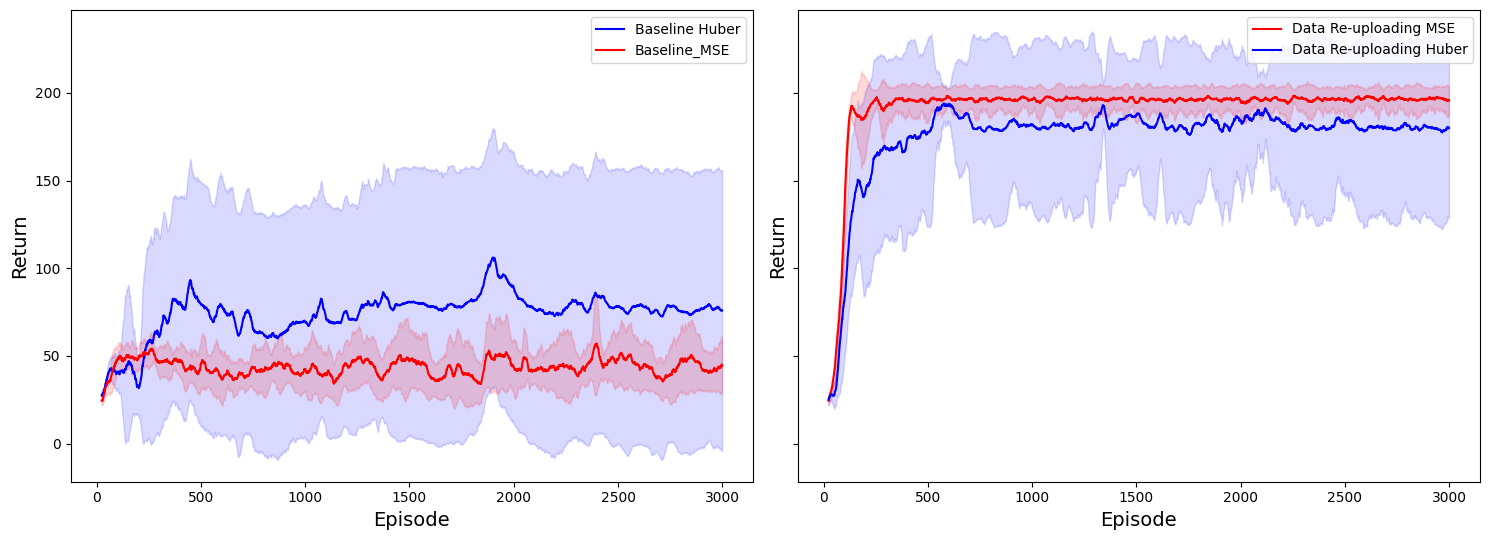

In [12]:
# calculate the mean and standard deviation of the moving averages for each agent
means_baseline_skolik_huber = np.mean(moving_average_baseline_skolik_huber, axis=0)
stds_baseline_skolik_huber = np.std(moving_average_baseline_skolik_huber, axis=0)
means_schuld_skolik_huber = np.mean(moving_average_schuld_skolik_huber, axis=0)
stds_schuld_skolik_huber = np.std(moving_average_schuld_skolik_huber, axis=0)
means_baseline_skolik_mse = np.mean(moving_average_baseline_skolik_mse, axis=0)
stds_baseline_skolik_mse = np.std(moving_average_baseline_skolik_mse, axis=0)
means_schuld_skolik_mse = np.mean(moving_average_schuld_skolik_mse, axis=0)
stds_schuld_skolik_mse = np.std(moving_average_schuld_skolik_mse, axis=0)

# plot the mean of the moving averages for each agent with different colors
fig, axs = plt.subplots(1, 2, tight_layout = True, figsize=(15, 5.5), sharey = True)
axs[0].plot(means_baseline_skolik_huber, color='blue', linewidth=1.5, label='Baseline Huber')
axs[0].plot(means_baseline_skolik_mse, color='red', linewidth=1.5, label='Baseline_MSE')
axs[1].plot(means_schuld_skolik_mse, color='red', linewidth=1.5, label='Data Re-uploading MSE')
axs[1].plot(means_schuld_skolik_huber, color='blue', linewidth=1.5, label='Data Re-uploading Huber')

# add shaded regions for the standard deviation of the moving averages
axs[0].fill_between(range(len(means_baseline_skolik_huber)), means_baseline_skolik_huber-stds_baseline_skolik_huber, means_baseline_skolik_huber+stds_baseline_skolik_huber, color='blue', alpha=0.15)
axs[0].fill_between(range(len(means_baseline_skolik_mse)), means_baseline_skolik_mse-stds_baseline_skolik_mse, means_baseline_skolik_mse+stds_baseline_skolik_mse, color='red', alpha=0.15)
axs[1].fill_between(range(len(means_schuld_skolik_huber)), means_schuld_skolik_huber-stds_schuld_skolik_huber, means_schuld_skolik_huber+stds_schuld_skolik_huber, color='blue', alpha=0.15)
axs[1].fill_between(range(len(means_schuld_skolik_mse)), means_schuld_skolik_mse-stds_schuld_skolik_mse, means_schuld_skolik_mse+stds_schuld_skolik_mse, color='red', alpha=0.15)

# add labels and title
axs[0].set_xlabel('Episode', fontsize=14)
axs[0].set_ylabel('Return', fontsize=14)
axs[0].legend()
axs[1].set_xlabel('Episode', fontsize=14)
axs[1].set_ylabel('Return', fontsize=14)
axs[1].legend()

# show the plot
plt.show()


In [13]:
baseline_mean, baseline_variance = baseline_skolik_mse.get_gradients_all_params()
schuld_mean, schuld_variance = schuld_skolik_mse.get_gradients_all_params()

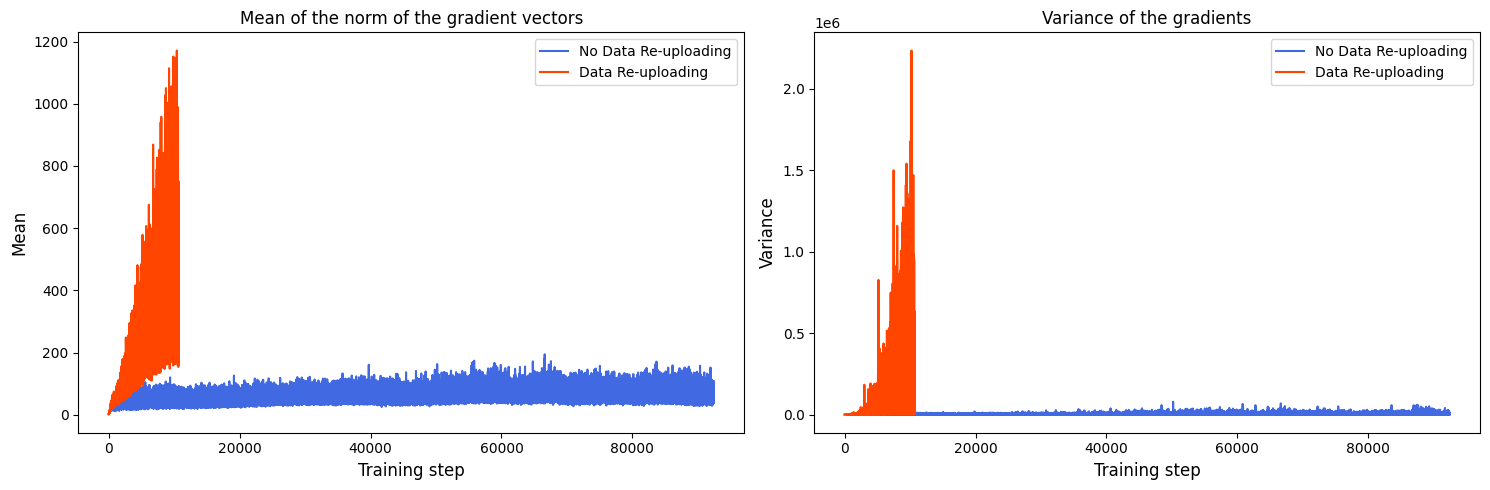

: 

In [14]:
fig, axs = plt.subplots(1, 2, tight_layout = True, figsize=(15, 5))

axs[0].set_title("Mean of the norm of the gradient vectors",fontsize = 12)
axs[0].set_xlabel("Training step",fontsize = 12)
axs[0].set_ylabel("Mean",fontsize = 12)
axs[0].plot(baseline_mean, color = "royalblue", label = 'No Data Re-uploading')
axs[0].plot(schuld_mean,color = "orangered", label = 'Data Re-uploading')
axs[0].legend()

axs[1].set_title('Variance of the gradients', fontsize = 12)
axs[1].set_xlabel('Training step', fontsize = 12)
axs[1].set_ylabel('Variance', fontsize = 12)
axs[1].plot(baseline_variance, color = "royalblue", label = 'No Data Re-uploading')
axs[1].plot(schuld_variance, color = "orangered", label = 'Data Re-uploading')
axs[1].legend()

As we can see, while the baseline model with MSE seems to perform worse than the one with Huber, the Data Re-uploading one performs much better. Furthermore, the algorithm is a lot more stable when we use MSE, as we can infer from the standard deviation being a lot smaller when we use MSE.

Now, let's do the same but for the UQC architecture.

In [11]:
uqc_huber_update5_layers5_path = "../../results/continuous/uqc/globalskolik_outscaling/XZ_obs/skolik_actual_optimal_hyper"
uqc_mse_update5_layers5_path = "../../results/continuous/uqc/globalskolik_outscaling/XZ_obs/skolik_actual_optimal_hyper_mse"

In [12]:
uqc_huber_update5_layers5 = Analysis(uqc_huber_update5_layers5_path)
uqc_mse_update5_layers5 = Analysis(uqc_mse_update5_layers5_path)

: 

: 

In [ ]:
moving_average_uqc_huber_update5_layers5 = uqc_huber_update5_layers5.get_moving_average(25)
moving_average_uqc_mse_update5_layers5 = uqc_mse_update5_layers5.get_moving_average(25)

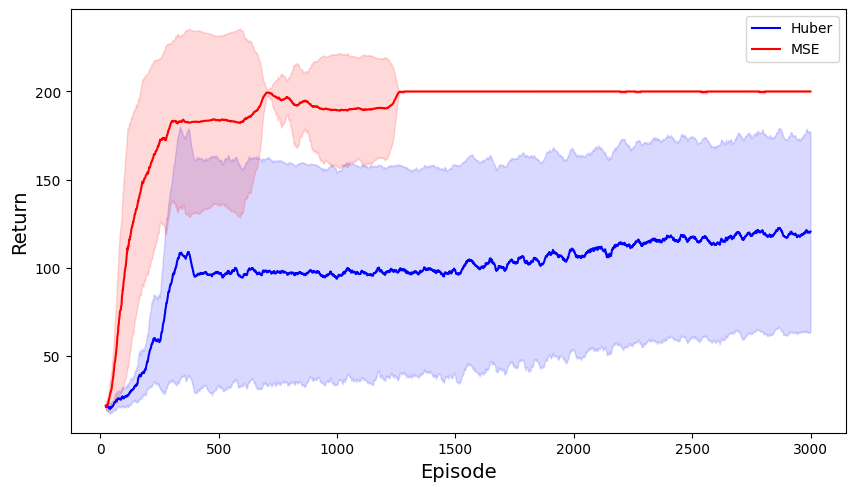

In [15]:
# calculate the mean and standard deviation of the moving averages for each agent
means_uqc_huber_update5_layers5 = np.mean(moving_average_uqc_huber_update5_layers5, axis=0)
stds_uqc_huber_update5_layers5 = np.std(moving_average_uqc_huber_update5_layers5, axis=0)
means_uqc_mse_update5_layers5 = np.mean(moving_average_uqc_mse_update5_layers5, axis=0)
stds_uqc_mse_update5_layers5 = np.std(moving_average_uqc_mse_update5_layers5, axis=0)

# plot the mean of the moving averages for each agent with different colors
plt.figure(figsize=(10, 5.5))
plt.plot(means_uqc_huber_update5_layers5, color='blue', linewidth=1.5, label='Huber')
plt.plot(means_uqc_mse_update5_layers5, color='red', linewidth=1.5, label='MSE')

# add shaded regions for the standard deviation of the moving averages
plt.fill_between(range(len(means_uqc_huber_update5_layers5)), means_uqc_huber_update5_layers5-stds_uqc_huber_update5_layers5, means_uqc_huber_update5_layers5+stds_uqc_huber_update5_layers5, color='blue', alpha=0.15)
plt.fill_between(range(len(means_uqc_mse_update5_layers5)), means_uqc_mse_update5_layers5-stds_uqc_mse_update5_layers5, means_uqc_mse_update5_layers5+stds_uqc_mse_update5_layers5, color='red', alpha=0.15)

# add labels and title
plt.xlabel('Episode', fontsize=14)
plt.ylabel('Return', fontsize=14)
plt.legend()

# show the plot
plt.show()

The results are incredible. It went from not converging to a very stable algorithm. Besides, the standar deviation is a lot smaller. Furthermore, the performance seems even a little bit worse because one of the agents performed very badly in the beggining and is an outlier. For example, If we consider the performance without that one agent:

In [31]:
moving_average_uqc_mse_update5_layers5_without_outlier =  moving_average_uqc_mse_update5_layers5.pop(1)

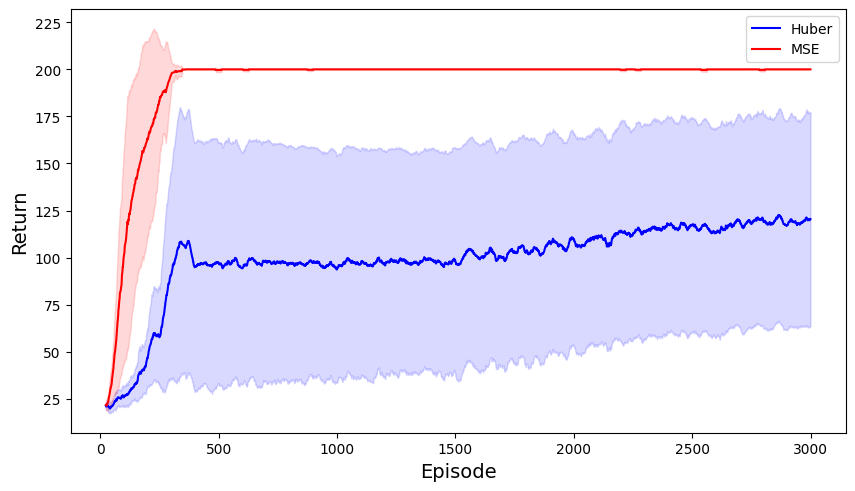

In [33]:
# calculate the mean and standard deviation of the moving averages for each agent
means_uqc_huber_update5_layers5 = np.mean(moving_average_uqc_huber_update5_layers5, axis=0)
stds_uqc_huber_update5_layers5 = np.std(moving_average_uqc_huber_update5_layers5, axis=0)
means_uqc_mse_update5_layers5 = np.mean(moving_average_uqc_mse_update5_layers5, axis=0)
stds_uqc_mse_update5_layers5 = np.std(moving_average_uqc_mse_update5_layers5, axis=0)

# plot the mean of the moving averages for each agent with different colors
plt.figure(figsize=(10, 5.5))
plt.plot(means_uqc_huber_update5_layers5, color='blue', linewidth=1.5, label='Huber')
plt.plot(means_uqc_mse_update5_layers5, color='red', linewidth=1.5, label='MSE')

# add shaded regions for the standard deviation of the moving averages
plt.fill_between(range(len(means_uqc_huber_update5_layers5)), means_uqc_huber_update5_layers5-stds_uqc_huber_update5_layers5, means_uqc_huber_update5_layers5+stds_uqc_huber_update5_layers5, color='blue', alpha=0.15)
plt.fill_between(range(len(means_uqc_mse_update5_layers5)), means_uqc_mse_update5_layers5-stds_uqc_mse_update5_layers5, means_uqc_mse_update5_layers5+stds_uqc_mse_update5_layers5, color='red', alpha=0.15)

# add labels and title
plt.xlabel('Episode', fontsize=14)
plt.ylabel('Return', fontsize=14)
plt.legend()

# show the plot
plt.show()

Then, I tried to change the number of layers to compare the differences in performance and to try to find the optimal number of layers.

In [2]:
uqc_mse_layers5_path = "../../results/continuous/uqc/globalskolik_outscaling/XZ_obs/skolik_actual_optimal_hyper_mse"
uqc_mse_layers3_path = "../../results/continuous/uqc/globalskolik_outscaling/XZ_obs/skolik_actual_optimal_hyper_mse_3layers"
uqc_mse_layers4_path = "../../results/continuous/uqc/globalskolik_outscaling/XZ_obs/skolik_actual_optimal_hyper_mse_4layers"
uqc_mse_layers6_path = "../../results/continuous/uqc/globalskolik_outscaling/XZ_obs/skolik_actual_optimal_hyper_mse_6layers"
uqc_mse_layers7_path = "../../results/continuous/uqc/globalskolik_outscaling/XZ_obs/skolik_actual_optimal_hyper_mse_7layers"

In [3]:
uqc_mse_layers3 = Analysis(uqc_mse_layers3_path)
uqc_mse_layers4 = Analysis(uqc_mse_layers4_path)
uqc_mse_layers5 = Analysis(uqc_mse_layers5_path)
uqc_mse_layers6 = Analysis(uqc_mse_layers6_path)
uqc_mse_layers7 = Analysis(uqc_mse_layers7_path)

In [7]:
moving_average_uqc_mse_layers3 = uqc_mse_layers3.get_moving_average(25)
moving_average_uqc_mse_layers4 = uqc_mse_layers4.get_moving_average(25)
moving_average_uqc_mse_layers5 = uqc_mse_layers5.get_moving_average(25)
moving_average_uqc_mse_layers5_without_outlier = moving_average_uqc_mse_layers5.pop(1)
moving_average_uqc_mse_layers6 = uqc_mse_layers6.get_moving_average(25)
moving_average_uqc_mse_layers7 = uqc_mse_layers7.get_moving_average(25)

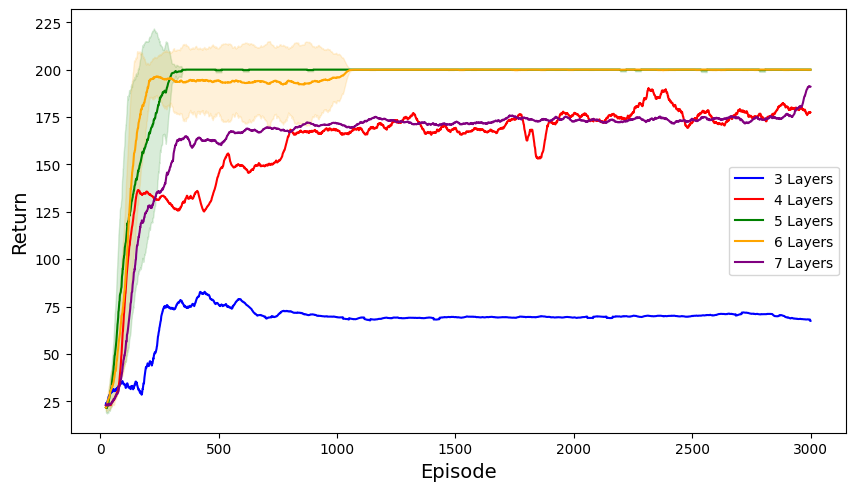

In [8]:
# calculate the mean and standard deviation of the moving averages for each agent
means_uqc_mse_layers3 = np.mean(moving_average_uqc_mse_layers3, axis=0)
stds_uqc_mse_layers3 = np.std(moving_average_uqc_mse_layers3, axis=0)
means_uqc_mse_layers4 = np.mean(moving_average_uqc_mse_layers4, axis=0)
stds_uqc_mse_layers4 = np.std(moving_average_uqc_mse_layers4, axis=0)
means_uqc_mse_layers5 = np.mean(moving_average_uqc_mse_layers5, axis=0)
stds_uqc_mse_layers5 = np.std(moving_average_uqc_mse_layers5, axis=0)
means_uqc_mse_layers6 = np.mean(moving_average_uqc_mse_layers6, axis=0)
stds_uqc_mse_layers6 = np.std(moving_average_uqc_mse_layers6, axis=0)
means_uqc_mse_layers7 = np.mean(moving_average_uqc_mse_layers7, axis=0)
stds_uqc_mse_layers7 = np.std(moving_average_uqc_mse_layers7, axis=0)

# plot the mean of the moving averages for each agent with different colors
plt.figure(figsize=(10, 5.5))
plt.plot(means_uqc_mse_layers3, color='blue', linewidth=1.5, label='3 Layers')
plt.plot(means_uqc_mse_layers4, color='red', linewidth=1.5, label='4 Layers')
plt.plot(means_uqc_mse_layers5, color='green', linewidth=1.5, label='5 Layers')
plt.plot(means_uqc_mse_layers6, color='orange', linewidth=1.5, label='6 Layers')
plt.plot(means_uqc_mse_layers7, color='purple', linewidth=1.5, label='7 Layers')

# add shaded regions for the standard deviation of the moving averages
#plt.fill_between(range(len(means_uqc_mse_layers3)), means_uqc_mse_layers3-stds_uqc_mse_layers3, means_uqc_mse_layers3+stds_uqc_mse_layers3, color='blue', alpha=0.15)
#plt.fill_between(range(len(means_uqc_mse_layers4)), means_uqc_mse_layers4-stds_uqc_mse_layers4, means_uqc_mse_layers4+stds_uqc_mse_layers4, color='red', alpha=0.15)
plt.fill_between(range(len(means_uqc_mse_layers5)), means_uqc_mse_layers5-stds_uqc_mse_layers5, means_uqc_mse_layers5+stds_uqc_mse_layers5, color='green', alpha=0.15)
plt.fill_between(range(len(means_uqc_mse_layers6)), means_uqc_mse_layers6-stds_uqc_mse_layers6, means_uqc_mse_layers6+stds_uqc_mse_layers6, color='orange', alpha=0.15)
#plt.fill_between(range(len(means_uqc_mse_layers7)), means_uqc_mse_layers7-stds_uqc_mse_layers7, means_uqc_mse_layers7+stds_uqc_mse_layers7, color='purple', alpha=0.15)

# add labels and title
plt.xlabel('Episode', fontsize=14)
plt.ylabel('Return', fontsize=14)
plt.legend()

# show the plot
plt.show()

So, 5 seems to be the best number of layers, specially if we dont take the outlier into consideration. Thus, we will keep using 5 layers for the rest of the experiments.

Now, I wanted to verify the impact of the steps_per_target_update on the performance of the agents.

In [6]:
path_5steps = "../../results/continuous/uqc/globalskolik_outscaling/XZ_obs/skolik_actual_optimal_hyper_mse"
path_4steps = "../../results/continuous/uqc/globalskolik_outscaling/XZ_obs/skolik_actual_optimal_hyper_mse1_4"
path_3steps = "../../results/continuous/uqc/globalskolik_outscaling/XZ_obs/skolik_actual_optimal_hyper_mse1_3"
path_2steps = "../../results/continuous/uqc/globalskolik_outscaling/XZ_obs/skolik_actual_optimal_hyper_mse1_2"
path_1steps = "../../results/continuous/uqc/globalskolik_outscaling/XZ_obs/skolik_actual_optimal_hyper_mse1_1"

In [7]:
analysis_5steps = Analysis(path_5steps)
analysis_4steps = Analysis(path_4steps)
analysis_3steps = Analysis(path_3steps)
#analysis_2steps = Analysis(path_2steps)
#analysis_1steps = Analysis(path_1steps)

In [8]:
moving_average_5steps = analysis_5steps.get_moving_average(25)
moving_average_4steps = analysis_4steps.get_moving_average(25)
moving_average_3steps = analysis_3steps.get_moving_average(25)

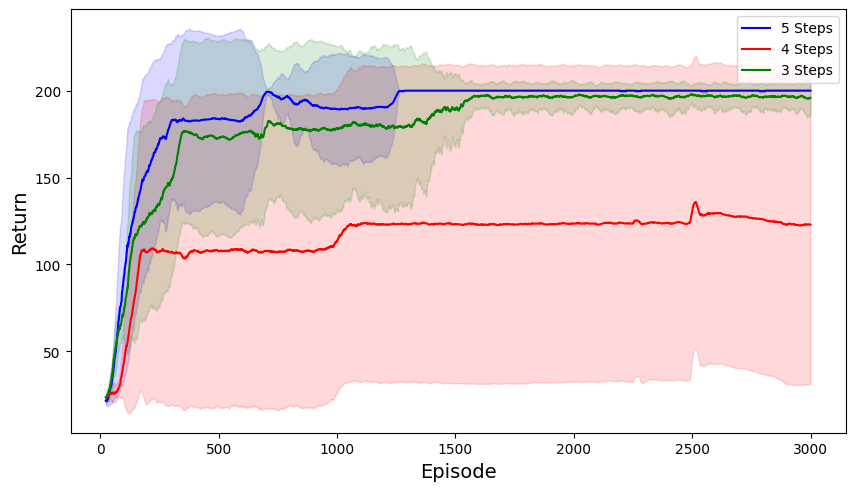

In [9]:
# calculate the mean and standard deviation of the moving averages for each agent
means_5steps = np.mean(moving_average_5steps, axis=0)
stds_5steps = np.std(moving_average_5steps, axis=0)
means_4steps = np.mean(moving_average_4steps, axis=0)
stds_4steps = np.std(moving_average_4steps, axis=0)
means_3steps = np.mean(moving_average_3steps, axis=0)
stds_3steps = np.std(moving_average_3steps, axis=0)

# plot the mean of the moving averages for each agent with different colors
plt.figure(figsize=(10, 5.5))
plt.plot(means_5steps, color='blue', linewidth=1.5, label='5 Steps')
plt.plot(means_4steps, color='red', linewidth=1.5, label='4 Steps')
plt.plot(means_3steps, color='green', linewidth=1.5, label='3 Steps')

# add shaded regions for the standard deviation of the moving averages
plt.fill_between(range(len(means_5steps)), means_5steps-stds_5steps, means_5steps+stds_5steps, color='blue', alpha=0.15)
plt.fill_between(range(len(means_4steps)), means_4steps-stds_4steps, means_4steps+stds_4steps, color='red', alpha=0.15)
plt.fill_between(range(len(means_3steps)), means_3steps-stds_3steps, means_3steps+stds_3steps, color='green', alpha=0.15)

# add labels and title
plt.xlabel('Episode', fontsize=14)
plt.ylabel('Return', fontsize=14)
plt.legend()

# show the plot
plt.show()